In [1]:
%matplotlib inline

import collections
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
import sklearn.manifold

from complexity_measures import utils

In [2]:
def cosine_distances(data):
    dense_distances = scipy.spatial.distance.pdist(data, "cosine")
    distances = scipy.spatial.distance.squareform(dense_distances)
    return distances

def euclidean_distances(data):
    dense_distances = scipy.spatial.distance.pdist(data.div(np.linalg.norm(data_std, ord=2, axis=1), axis=0), "euclidean")
    distances = scipy.spatial.distance.squareform(dense_distances)
    return distances

In [3]:
metadata = pd.read_csv("/ccl/projects/Kallimachos/low_high_brow_corpus_v2/metadata.tsv", sep="\t", header=0, index_col=0)

In [4]:
#frequencies = {}
#for idx, text in metadata.iterrows():
#    with open("/ccl/projects/Kallimachos/low_high_brow_corpus_v2/%s" % text["filename"]) as f:
#        dep_trees, const_trees = zip(*utils.read_txt_csv_graphs(f, warnings=False))
#    frequencies[idx] = collections.Counter(l["token"].lower() for t in dep_trees for v, l in t.nodes(data=True))

In [5]:
#with open("frequencies.json", mode="w") as f:
#    json.dump(frequencies, f)

In [6]:
with open("frequencies.json") as f:
    frequencies = json.load(f)

In [7]:
data = pd.DataFrame.from_dict(frequencies).transpose()
data = data.fillna(0)
# convert to relative frequencies
data = data.div(data.sum(axis=1), axis=0)
# remove terms that occur in less than 2 documents
data = data[data.columns[data.astype(bool).sum(axis=0) >= 2]]

In [8]:
# standardize data
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

In [9]:
# scale data
data_scl = data / data.max(axis=0)

In [10]:
genres = metadata.loc[[int(i) for i in data.index], "genre"].values

In [11]:
nonmetric_mds = sklearn.manifold.MDS(n_components=2, metric=False, dissimilarity='precomputed')
metric_mds = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')
tsne = sklearn.manifold.TSNE(n_components=2, metric='precomputed')

In [12]:
std_cos = cosine_distances(data_std)
std_euc = euclidean_distances(data_std)
scl_cos = cosine_distances(data_scl)
scl_euc = euclidean_distances(data_scl)

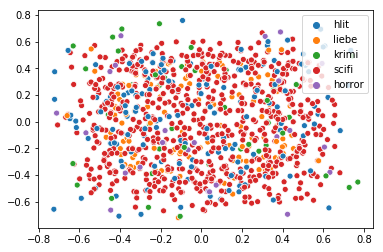

In [13]:
std_cos_mds = nonmetric_mds.fit_transform(std_cos)
sns.scatterplot(x=std_cos_mds[:, 0], y=std_cos_mds[:, 1], hue=genres)

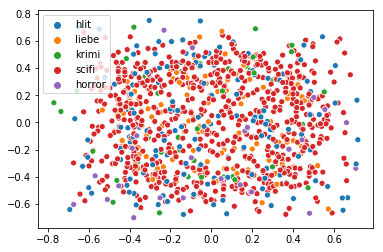

In [14]:
std_euc_mds = nonmetric_mds.fit_transform(std_euc)
sns.scatterplot(x=std_euc_mds[:, 0], y=std_euc_mds[:, 1], hue=genres)

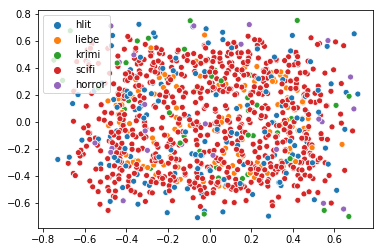

In [15]:
scl_cos_mds = nonmetric_mds.fit_transform(scl_cos)
sns.scatterplot(x=scl_cos_mds[:, 0], y=scl_cos_mds[:, 1], hue=genres)

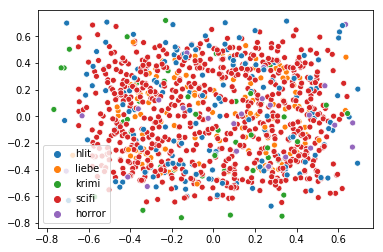

In [16]:
scl_euc_mds = nonmetric_mds.fit_transform(scl_euc)
sns.scatterplot(x=scl_euc_mds[:, 0], y=scl_euc_mds[:, 1], hue=genres)

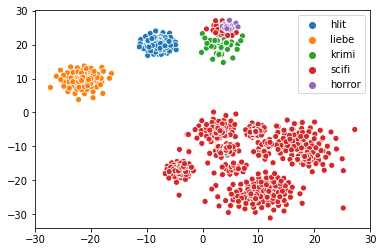

In [17]:
std_euc_tsne = tsne.fit_transform(std_euc)
sns.scatterplot(x=std_euc_tsne[:, 0], y=std_euc_tsne[:, 1], hue=genres)

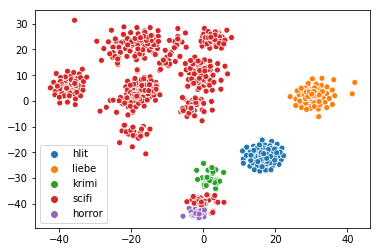

In [18]:
std_cos_tsne = tsne.fit_transform(std_cos)
sns.scatterplot(x=std_cos_tsne[:, 0], y=std_cos_tsne[:, 1], hue=genres)